# Подтверждение взаимосвязи ROC анализа и KS на числах

План следующи построим простенькую модель - на ней посчитаем fpr, tpr и KS, показем взаимосвязь

In [16]:
import numpy as np

# Случайный набор данных

In [ ]:
import matplotlib.pyplot as plt

Настройки генератора

In [55]:
# объемы различных подвыборок
n_count = 300
p_count = 200

n = n_count + p_count

# дисперсия характеризующая разброс
sigma = 0.3

Генерация

In [64]:
X1 = np.concatenate([
    np.random.normal(0.2, sigma, n_count),
    np.random.normal(0.8, sigma, p_count)
]).reshape(n,1)
X2 = np.concatenate([
    np.random.normal(0.8, sigma, n_count),
    np.random.normal(0.2, sigma, p_count)
]).reshape(n,1)


Y = np.concatenate([
    np.zeros(n_count).astype('bool'),
    np.ones(p_count).astype('bool')
])

X = np.concatenate([X1, X2], axis = 1)

Визуализация того, что получилось

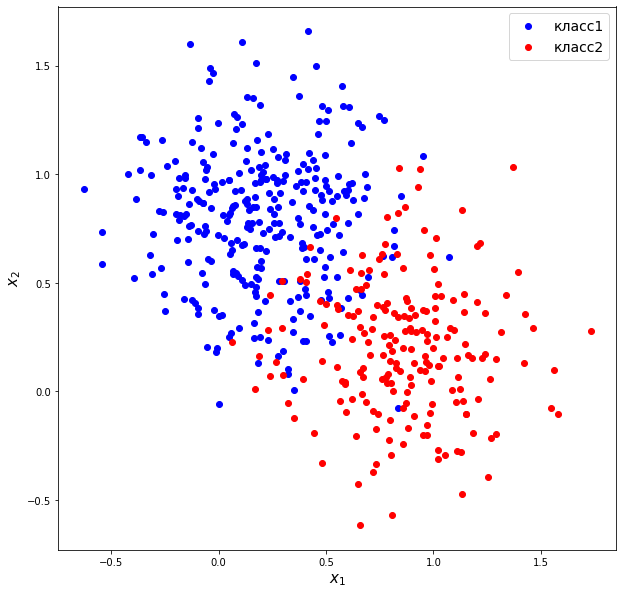

In [65]:
def draw_my_scatter(X1,X2,Y):
    plt.scatter(X1[np.invert(Y)], X2[np.invert(Y)], color = 'blue')
    plt.scatter(X1[Y], X2[Y], color = 'red')

    plt.xlabel('$x_1$', fontsize = 15)
    plt.ylabel('$x_2$', fontsize = 15)
    plt.legend(['класс1', 'класс2'], fontsize = 14)

plt.figure(figsize = (10,10))
draw_my_scatter(X1, X2, Y)

# Строим модель

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

In [67]:
model = LogisticRegression().fit(X, Y.ravel())
probs_hat = model.predict_proba(X)[:,1]

# Считаем метрики

Сначала KS

In [68]:
from scipy.stats import kstest

# сравниваем предсказанные вероятности
# дефолтников и недефолтников
kstest(probs_hat[Y.ravel()], probs_hat[np.invert(Y.ravel())])

KstestResult(statistic=0.8633333333333333, pvalue=0.0)

Вычислим fpr, tpr для различных точек отсечения

In [72]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y, probs_hat)

Теперь почитам максимальное расстояние между FPR и TPR

In [73]:
np.max(np.abs(fpr - tpr))

0.8633333333333334

# Вывод

Максимальное расстояние между FPR и TRP и есть AUC. Что в целом логично ведь KS стастистика в данном случае:

$$KS = argmax_{p}(|\hat{F}_n(p)-\hat{F}_p(p)|)$$

Где $p$ - предсказанное моделью значение;<br>
    $\hat{F}_p(x)$ - функция распределения по $p$ наблюдений c исследуемым признаком; <br>
    $\hat{F}_n(x)$ - функция распределения по $p$ наблюдений без исследуемого признака.
    
А fpr и tpr могут быть записаны так:

$$FPR(p) = 1 - \hat{F}_n(p)$$
$$TPR(p) = 1 - \hat{F}_p(p)$$

Где $p$ - таже самая вероятность, но уже выбираемая исследователем, по смыслу - точка отсечения.

Теперь запишем закономерность на которую я хотел обратить внимание.

$$argmax_{p}(|FPR(p)-TPR(p)|) = argmax_p(|1 - \hat{F}_n(p) - (1 - \hat{F}_p(p))|) = argmax_{p}(|\hat{F}_n(p)-\hat{F}_p(p)|) = KS$$